# Siggi Example

### Import necessary code from repo

In [1]:
import sys
sys.path.append('..')

In [2]:
from siggi import siggi, spectra, calcIG, plotting
from siggi.filters import filterFactory
from siggi import Sed
from siggi.lsst_utils import BandpassDict
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Set up filter object and get example spectra

In [3]:
f = filterFactory.create_filter_object('trap')
s = spectra()
red_spec = s.get_red_spectrum()
blue_spec = s.get_blue_spectrum()

### Define redshift prior

In [4]:
def prior_z(z, z0=0.5):
    return (z**2.)*np.exp(-(z/z0)**1.5)/(np.sum((np.arange(0, 2.51, .05)**2.)*np.exp(-(np.arange(0, 2.51, .05)/z0)**1.5)))

In [5]:
# Shows the total entropy for 2 SEDs with equal weighting
entropy = -1. * .5 * np.sum(prior_z(np.arange(0.05, 2.51, .05)) * np.log2(.5 * prior_z(np.arange(0.05, 2.51, .05))))
print(entropy*2.)

5.807147751224095


### Set up a siggi object with the SEDs, the SED weights, the prior, and the redshift binning defined.

In [6]:
sig_example = siggi([red_spec, blue_spec], [0.5, 0.5], prior_z,
                    z_min=0.00, z_max=2.5, z_steps=51)

### Can also include a set of filters that are static and not moved in the optimization

Here we use the LSST *ugrizy* filters

In [7]:
frozen_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='../siggi/data/lsst_baseline_throughputs/')
# To make things more interesting we will just use the 'u' and 'g' filters.
frozen_dict = BandpassDict(frozen_dict.values()[:2], frozen_dict.keys()[:2])

### Run optimization

In [8]:
%%time
random_state = np.random.RandomState(17)
num_filters = 2
set_ratio = 1.0
res = sig_example.optimize_filters(num_filters=num_filters, filt_type='trap',
                                   filt_min=300., filt_max=1100.,
                                   set_ratio=set_ratio,
                                   system_wavelen_max=1200.,
                                   n_opt_points=25,
                                   optimizer_verbosity=10,
                                   procs=4, acq_func_kwargs_dict={'kappa':3},
                                   frozen_filt_dict=frozen_dict, frozen_filt_eff_wavelen=[365, 477],
                                   starting_points = None,
                                   rand_state = random_state)

[(300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0)] [[300.0, 700.0, 700.0, 1100.0], [300.0, 500.0, 500.0, 700.0], [700.0, 900.0, 900.0, 1100.0], [354.3202865530331, 453.2166295579959, 535.7320021496878, 724.4694044842353], [760.4823150024272, 810.0167168349087, 825.0668174206844, 929.5883679999306], [331.2503329510932, 348.0357442523083, 586.2508835868391, 1056.5465494547261], [340.95493249636297, 821.9348923725239, 991.2336828369688, 1001.8324209184242], [526.3905286855929, 686.8228994480016, 741.4010949079002, 778.0106025912407], [538.1805746414173, 616.8379488376213, 749.2071242610889, 930.9605677431197], [344.193080172659, 415.1231366202623, 420.72535553654166, 634.7875082767016]]
[[300.0, 700.0, 700.0, 1100.0], [300.0, 500.0, 500.0, 700.0], [700.0, 900.0, 900.0, 1100.0], [354.3202865530331, 453.2166295579959, 535.7320021496878, 724.4694044842353], [760.4823150024272, 810.0167168349087, 825.0668174206844, 929.5883679999306], [331.2503329510932, 348.0357442523083, 5

[Parallel(n_jobs=4)]: Using backend MultiprocessingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   47.7s remaining:   47.7s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   56.6s remaining:   24.3s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.1min finished


-1.4846564033511163 10
[513.5999999998057, 906.2999999994486] [[300.0, 299.99999999999994, 727.035419900943, 727.0354199009431], [712.4695560442395, 712.4695560442397, 1100.0, 1100.0]]
[660.2999999996723, 1000.0999999993633] [[420.5779784372345, 420.5779784372345, 899.9999956878406, 899.9999956878406], [900.0000016479926, 900.0000016479926, 1100.0, 1100.0]]
[684.9999999996498, 843.9999999995052] [[671.243004116826, 671.2430041168261, 698.5325948908492, 698.5325948908492], [782.1189384350478, 782.1189384350478, 905.6393191858888, 905.6393191858887]]
4
[699.9999999996362, 907.0999999994478] [[300.0, 300.0, 1100.0, 1100.0], [714.0874839878445, 714.0874839878445, 1100.0, 1100.0]]
5
Random Points Used: 0


[Parallel(n_jobs=4)]: Using backend MultiprocessingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   25.9s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   26.4s remaining:   26.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   26.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   26.7s finished


-1.5433069332724325 14
[522.9999999997972, 912.399999999443] [[300.0, 300.0, 745.9137073921017, 745.9137073921017], [724.7285393620393, 724.7285393620393, 1100.0, 1100.0]]
[614.5999999997139, 780.1999999995633] [[512.1909579103453, 512.1909579103453, 716.8022616674339, 716.802261667434], [701.1317329545932, 701.1317329545932, 859.0761028360632, 859.0761028360632]]
[520.999999999799, 900.5999999994538] [[339.3686831786113, 339.3686831786114, 702.5636322678102, 702.5636322678102], [701.1810850386526, 701.1810850386526, 1099.9998641317338, 1099.9998641317338]]
[514.1999999998052, 832.6999999995155] [[303.6986394931857, 303.69863949318574, 724.5270776303867, 724.5270776303867], [664.6894227601681, 664.6894227601681, 1000.5205843149358, 1000.5205843149358]]
4
Random Points Used: 0


[Parallel(n_jobs=4)]: Using backend MultiprocessingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   22.7s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   23.0s remaining:   23.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   23.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   23.2s finished


-1.5687461266421137 18
[544.1999999997779, 906.5999999994483] [[324.3602806756474, 324.36028067564735, 763.8066457682601, 763.8066457682601], [732.7208103832222, 732.7208103832222, 1080.2173619072169, 1080.2173619072169]]
[520.1999999997997, 913.3999999994421] [[300.0, 300.0, 740.2115407331157, 740.2115407331157], [726.6253903650384, 726.6253903650384, 1100.0, 1100.0]]
4
[579.9999999997453, 862.999999999488] [[372.2487904750766, 372.24879047507665, 787.6102915951876, 787.6102915951876], [733.4322172622335, 733.4322172622335, 992.4031578897718, 992.4031578897719]]
[531.2999999997896, 914.9999999994407] [[301.95626246752295, 301.95626246752295, 760.5617416518912, 760.5617416518912], [738.4809820338241, 738.4809820338241, 1091.3593336681056, 1091.3593336681056]]
6
Random Points Used: 0


[Parallel(n_jobs=4)]: Using backend MultiprocessingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   21.5s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   21.6s remaining:   21.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   22.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   22.0s finished


-1.5840357535798972 22
[544.6999999997774, 925.8999999994307] [[300.0, 300.0, 789.3576244302824, 789.3576244302824], [751.7077174204983, 751.7077174204983, 1100.0, 1100.0]]
[531.1999999997897, 913.5999999994419] [[303.81362340605034, 303.8136234060503, 758.3282190800714, 758.3282190800714], [736.9262202920952, 736.9262202920952, 1090.0778691940764, 1090.0778691940764]]
[408.3999999999014, 691.399999999644] [[306.60247035824165, 306.6024703582416, 510.00437574732086, 510.00437574732086], [689.4880998663693, 689.4880998663693, 693.206624959086, 693.206624959086]]
[542.6999999997793, 709.5999999996275] [[371.0471640424875, 371.04716404248757, 714.2261582227964, 714.2261582227964], [403.0391902264058, 403.0391902264059, 1016.0952956437054, 1016.0952956437054]]
4
Random Points Used: 0


[Parallel(n_jobs=4)]: Using backend MultiprocessingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   21.4s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   21.5s remaining:   21.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   21.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   21.8s finished


-1.5840357535798972 26
CPU times: user 32.5 s, sys: 2.05 s, total: 34.5 s
Wall time: 3min 7s


### Find the best results

In [9]:
min_idx = np.argmin(res.yi)

In [10]:
best_pt = res.Xi[min_idx]

In [11]:
best_val = np.min(res.yi)

In [12]:
print(best_pt, best_val)

[301.95626246752295, 760.5617416518912, 738.4809820338241, 1091.3593336681056] -1.5840357535798972


### Plot with Siggi's plotting code

In [13]:
red_spec.redshiftSED(0.5)
blue_spec.redshiftSED(0.5)
sig_plot = plotting([red_spec, blue_spec], best_pt, 'trap', set_ratio=1.0,
                    frozen_filt_dict=frozen_dict, frozen_filt_eff_wavelen=[365, 477],
                    sed_mags=22.0)

#### Let's first make a plot of the new filters along with the filters we've frozen in place. For reference we'll also include the SEDs at redshift z=0.5.

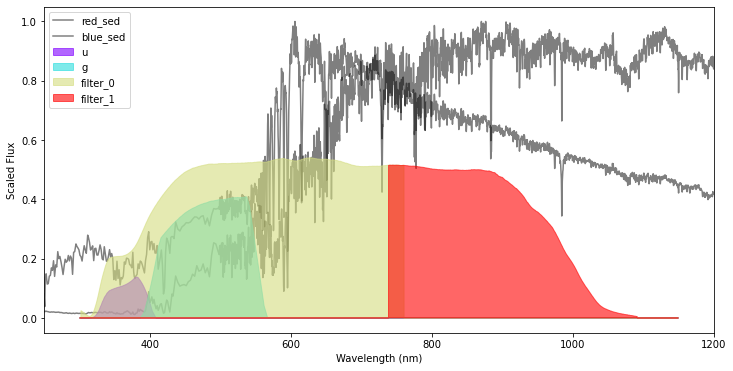

In [14]:
fig = sig_plot.plot_filters()
plt.legend(['red_sed', 'blue_sed'] + sig_plot.filter_dict.keys())

#### We can also look at a color-color plot of the new color values for each sed as it increases in redshift and the error bars on the colors

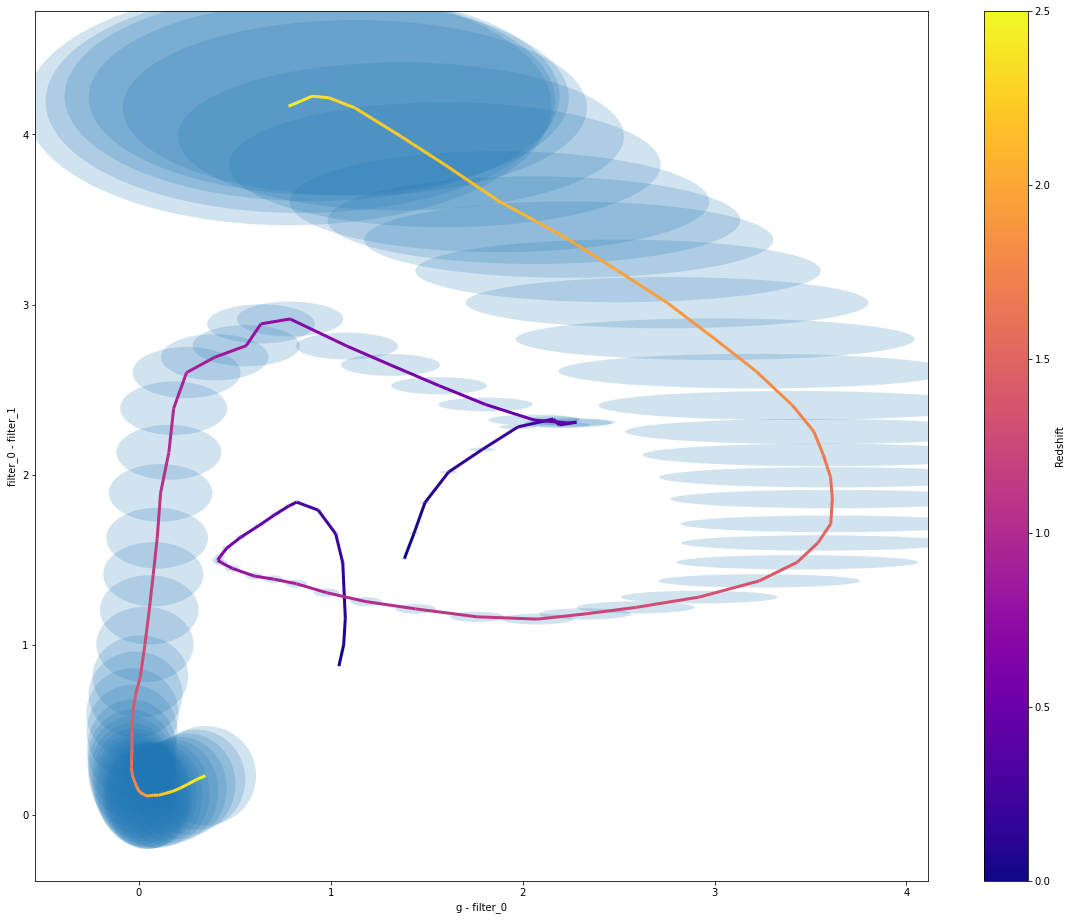

In [19]:
fig = plt.figure(figsize=(20,16))
fig = sig_plot.plot_color_color([['g', 'filter_0'], ['filter_0', 'filter_1']],
                                np.linspace(0.00, 2.5, 51), fig=fig, include_err=True,
                                ellip_kwargs={'alpha':0.2})

In [20]:
res.Xi

[[300.0, 700.0, 700.0, 1100.0],
 [300.0, 500.0, 500.0, 700.0],
 [700.0, 900.0, 900.0, 1100.0],
 [354.3202865530331, 453.2166295579959, 535.7320021496878, 724.4694044842353],
 [760.4823150024272, 810.0167168349087, 825.0668174206844, 929.5883679999306],
 [331.2503329510932, 348.0357442523083, 586.2508835868391, 1056.5465494547261],
 [340.95493249636297,
  821.9348923725239,
  991.2336828369688,
  1001.8324209184242],
 [526.3905286855929, 686.8228994480016, 741.4010949079002, 778.0106025912407],
 [538.1805746414173, 616.8379488376213, 749.2071242610889, 930.9605677431197],
 [344.193080172659, 415.1231366202623, 420.72535553654166, 634.7875082767016],
 [616.8473393846002, 831.1537899012814, 1099.8759646379854, 917.4427523120278],
 [300.0, 727.0354199009431, 712.4695560442395, 1100.0],
 [420.5779784372345, 899.9999956878406, 900.0000016479926, 1100.0],
 [671.243004116826, 698.5325948908492, 782.1189384350478, 905.6393191858887],
 [300.0, 1100.0, 714.0874839878445, 1100.0],
 [300.0, 745.913

In [25]:
res.Xi[10]

[616.8473393846002, 831.1537899012814, 1099.8759646379854, 917.4427523120278]

Text(0, 0.5, 'Filter 2 Center Wavelength (nm)')

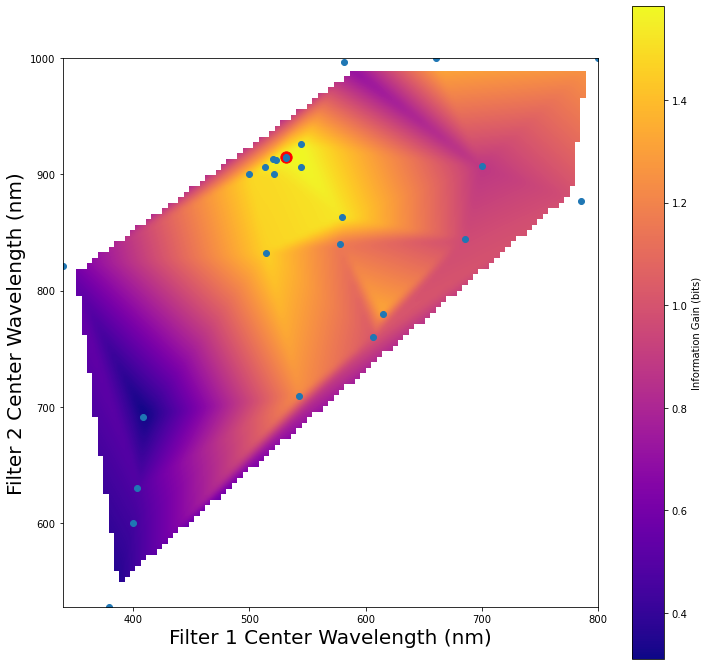

In [35]:
# Preliminary Feature #
# Information Gain Space plotting for multiple filters #
fig = plt.figure(figsize=(12,12))
xi, yi = sig_plot.plot_ig_space(np.array(res.Xi)[np.where(np.array(res.yi) != 0.)], 
                                np.abs(res.yi)[np.array(res.yi) != 0], [0,1], return_centers=True)
cbar = plt.colorbar()
cbar.set_label('Information Gain (bits)')
plt.scatter(best_pt[0] + (best_pt[1]-best_pt[0])/2., best_pt[2] + (best_pt[3]-best_pt[2])/2., c='r', s=128)
plt.scatter(xi, yi)
plt.xlabel('Filter 1 Center Wavelength (nm)', size=20)
plt.ylabel('Filter 2 Center Wavelength (nm)', size=20)